In [ ]:
!pip install opendatasets
!pip install contractions
!pip install autocorrect
!pip install openpyxl -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=aad50b5be91e090e6de83cd1e8b955c437642ac4e436f362b9078c86540ddcbf
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:

# library imports
import pandas as pd
import opendatasets
import contractions
from autocorrect import Speller
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook
import nltk
import re

In [ ]:
tqdm_notebook.pandas()


In [ ]:

# load the dataset
raw_data = pd.read_excel('/content/classifier new (2).xlsx')

In [ ]:
raw_data .columns

Index(['Sentences', 'OpinionTerm1', 'Aspect Category1', 'AspectPolarity1 ',
       'OpinionTerm2', 'Aspect Category2', 'Aspectpolarity2'],
      dtype='object')

In [ ]:
mapping = {
    'Company_Service': 'Company_Service',
    'App_Utility': 'App_Utility',
    'service_quality': 'service_quality',
    'service_person_attitude': 'service_person_attitude',
    'Cost': 'Cost',
    'App_UI': 'App_UI',
    'App_Functionality': 'App_Functionality',
    'service_schedule': 'service_schedule',
    'Customer_Support': 'Customer_Support',
    'cost': 'Cost',
    'Company_service': 'Company_Service',
    'Payment': 'Payment',
    'payment': 'Payment',
    'Customer_Suppor': 'Customer_Support'
}

# Replace variations with the standard name
raw_data['Aspect Category1'] = raw_data['Aspect Category1'].map(mapping)

In [ ]:

# define observation counts within each class
class_counts = raw_data['Aspect Category1'].value_counts()

In [ ]:
class_counts

Company_Service            2366
App_Utility                 578
service_quality             574
service_person_attitude     189
Cost                        136
App_UI                       74
App_Functionality            66
service_schedule             51
Customer_Support             50
Payment                       9
Name: Aspect Category1, dtype: int64

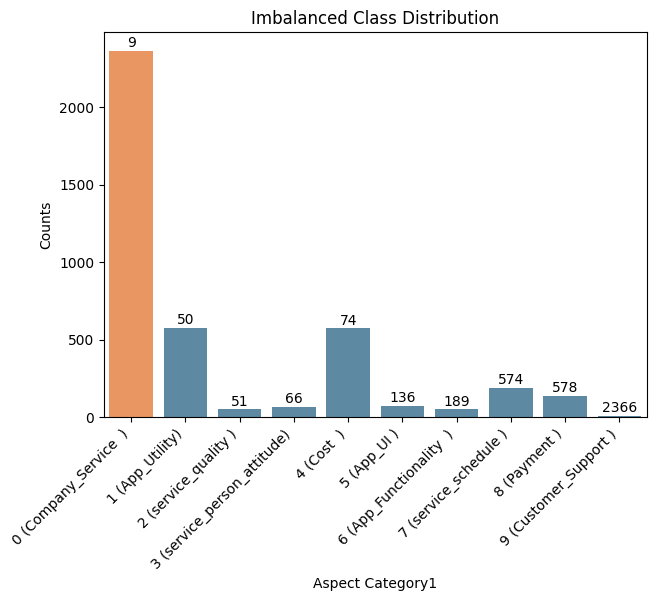

In [ ]:
# display a bar chart of the distribution
plt.figure(figsize = (7, 5))

# define colors
colors = ['#528CAD' if (x < max(class_counts)) else '#FF914D' for x in class_counts]

ax = sns.countplot(x=raw_data['Aspect Category1'],
                   data=raw_data,
                   palette=colors)
ax.set(title='Imbalanced Class Distribution')

# place labels above each bar
vals = class_counts.to_list()
vals.sort()
ax_labels = vals
rects = ax.patches
labels = [ax_labels[i] for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

# edit x-tick labels
ax.set_xticklabels(['0 (Company_Service  )', "1 (App_Utility)","2 (service_quality )","3 (service_person_attitude)","4 (Cost  )","5 (App_UI )","6 (App_Functionality  )","7 (service_schedule )","8 (Payment )","9 (Customer_Support )"],rotation=45, ha="right")

# y-axis label
ax.set_ylabel("Counts")

plt.show()

**DataAugmentation for Categories**

In [ ]:
!pip install textattack
!pip install tensorflow_text


In [ ]:
# List of categories you want to filter
categories_to_filter =['App_Utility', 'service_quality', 'service_person_attitude', 'Cost', 'App_UI', 'App_Functionality', 'service_schedule', 'Customer_Support', 'Payment']
# define a dataframe of only negative reviews
# Filter rows where 'Aspect Category1' is in the list of categories_to_filter
aspectcat = raw_data[raw_data['Aspect Category1'].isin(categories_to_filter)]

In [ ]:
aspectcat = raw_data[raw_data['Aspect Category1']=='service_quality']

In [ ]:
# initialize the augmentation model
from textattack.augmentation import EasyDataAugmenter
aug = EasyDataAugmenter(pct_words_to_insert=0.25,
                        transformations_per_example=3)


TypeError: ignored

In [ ]:
help(EasyDataAugmenter)

Help on class EasyDataAugmenter in module textattack.augmentation.recipes:

class EasyDataAugmenter(textattack.augmentation.augmenter.Augmenter)
 |  EasyDataAugmenter(pct_words_to_swap=0.1, transformations_per_example=4)
 |  
 |  An implementation of Easy Data Augmentation, which combines:
 |  
 |  - WordNet synonym replacement
 |      - Randomly replace words with their synonyms.
 |  - Word deletion
 |      - Randomly remove words from the sentence.
 |  - Word order swaps
 |      - Randomly swap the position of words in the sentence.
 |  - Random synonym insertion
 |      - Insert a random synonym of a random word at a random location.
 |  
 |  in one augmentation method.
 |  
 |  "EDA: Easy Data Augmentation Techniques for Boosting Performance on Text Classification Tasks" (Wei and Zou, 2019)
 |  https://arxiv.org/abs/1901.11196
 |  
 |  Method resolution order:
 |      EasyDataAugmenter
 |      textattack.augmentation.augmenter.Augmenter
 |      builtins.object
 |  
 |  Methods defi

In [ ]:


aug_corpus = []

def augmented_corpus(text):
  """
  Augment text and append to an array.
  """
  try:
    aug_corpus.extend(aug.augment(text))
  except:
    pass


In [ ]:
aspectcat['Sentences'].progress_apply(augmented_corpus)

  0%|          | 0/1727 [00:00<?, ?it/s]

1       None
2       None
3       None
5       None
6       None
        ... 
4154    None
4157    None
4158    None
4161    None
4163    None
Name: Sentences, Length: 1727, dtype: object

In [ ]:
df_aug_result = pd.DataFrame(zip(aug_corpus, [0]*len(aug_corpus)),
                             columns=['Sentences', 'AspectCategory1'])

# append augmented results to original 'Not Recommended' examples
df_aug_result = aspectcat.append(df_aug_result)

<ipython-input-58-c53698e46334>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aug_result = aspectcat.append(df_aug_result)


In [ ]:
df_aug_result.head()

,Sentences,OpinionTerm1,Aspect Category1,AspectPolarity1,OpinionTerm2,Aspect Category2,Aspectpolarity2,AspectCategory1
1,nice and good app,good app,App_Utility,positive,NaN,NaN,NaN,NaN
2,came on time work proeffetionaly complete,on time,service_schedule,positive,work proeffetionaly,service_person_attitude,positive,NaN
3,first time user and very satisfied.,first time user,App_Functionality,positive,satisfied,Company_Service,positive,NaN
5,Professional service. Prompt too!,professional service,service_quality,positive,prompt,service_quality,positive,NaN
6,on time & professionally done job,on time,service_schedule,positive,professionally done job,service_quality,positive,NaN


In [ ]:

# export to Excel
df_aug_result.to_excel('Augmented_Dataset_new.xlsx',
                        header=True,
                        index=False)


In [ ]:
for sentence in aspectcat['Sentences']:
    augmented_corpus(sentence)


Original text: nice and good app
Augmented text: ['app and good nice', 'and good app', 'nice and honorable app']
Original text: came on time work proeffetionaly complete
Augmented text: ['on came time work proeffetionaly complete', 'occur on time work proeffetionaly complete', 'came on time proeffetionaly complete']
Original text: first time user and very satisfied.
Augmented text: ['first time sentence user and very satisfied.', 'first time user and very.', 'first very user and time satisfied.']
Original text: Professional service. Prompt too!
Augmented text: ['Professional service. instigate too!', 'Professional service. Prompt!', 'besides Professional service. Prompt too!']
Original text: on time & professionally done job
Augmented text: ['on done & professionally time job', 'on time & professionally metre done job', 'on clock & professionally done job']
Original text: easy to use , good technicians
Augmented text: ['easy to use , ripe technicians', 'to use , good technicians', 'use

In [ ]:

aspectcat['Sentences'].progress_apply(augmented_corpus)

  0%|          | 0/1727 [00:00<?, ?it/s]

1       None
2       None
3       None
5       None
6       None
        ... 
4154    None
4157    None
4158    None
4161    None
4163    None
Name: Sentences, Length: 1727, dtype: object

In [ ]:
# Assuming your augmented_corpus function modifies the text in some way
def augmented_corpus(sentences, opinion_term):
    # Your augmentation logic here
    # Example: Concatenate sentences and opinion_term
    augmented_text = f"{sentences} {opinion_term}"
    return augmented_text

# Apply the function
aspectcat['AugmentedText'] = aspectcat.apply(lambda x: augmented_corpus(x['Sentences'], x['OpinionTerm1']), axis=1)


<ipython-input-16-93796b3cedff>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aspectcat['AugmentedText'] = aspectcat.apply(lambda x: augmented_corpus(x['Sentences'], x['OpinionTerm1']), axis=1)


In [ ]:
df_aug_result = pd.DataFrame(zip(aug_corpus, [0]*len(aug_corpus)),
                             columns=['Sentences', 'Aspect Category1'])

# append augmented results to original 'Not Recommended' examples
df_aug_result = aspectcat.append(df_aug_result)

<ipython-input-24-07f54075866f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aug_result = aspectcat.append(df_aug_result)


In [ ]:

print(len(df_aug_result))

12085


In [ ]:
# Assuming 'df_aug_result' contains the augmented DataFrame
category_counts = df_aug_result['Aspect Category1'].value_counts()

# Display the count of each category
print(category_counts)


0                          10358
App_Utility                  578
service_quality              574
service_person_attitude      189
Cost                         136
App_UI                        74
App_Functionality             66
service_schedule              51
Customer_Support              50
Payment                        9
Name: Aspect Category1, dtype: int64


In [ ]:
print(len(df_aug_result))

6906


In [ ]:

# export to Excel
df_aug_result.to_excel('Augmented_Dataset.xlsx',
                        header=True,
                        index=False)